In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipelinePPPPPP
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

## 1.Problem Statement
- Create a model to classify the Drug type based on their features

##  2.Data Collection

In [2]:
data = pd.read_csv(r"C:\Users\Hari D\Downloads\drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df=data.copy()
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


##  3.EDA

In [4]:
df.shape   

(200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df["BP"] = df["BP"].astype("category")
df["Cholesterol"] = df["Cholesterol"].astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    object  
 2   BP           200 non-null    category
 3   Cholesterol  200 non-null    category
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    object  
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 7.0+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [11]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

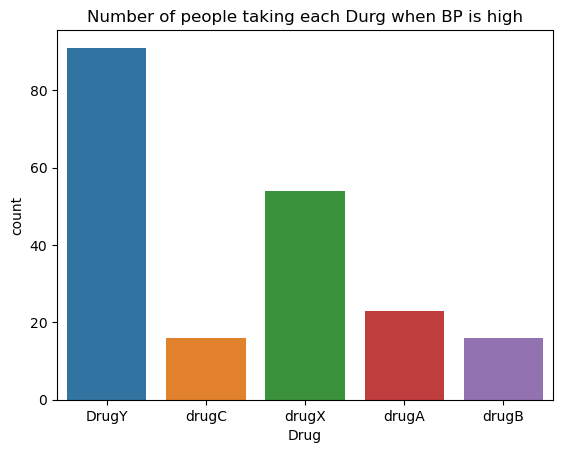

In [12]:
sns.countplot(data = df, x='Drug')
plt.title('Number of people taking each Durg when BP is high')
plt.show()

## 4.Pre-Processing

In [13]:
fv = df.iloc[:,:-1]   
cv = df.iloc[:,-1]

In [14]:
fv

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [15]:
cv

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()    
cv = lbe.fit_transform(cv)

In [17]:
cv

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

## 5. EDA

In [18]:
cor = fv.corr(numeric_only=True)
cor

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


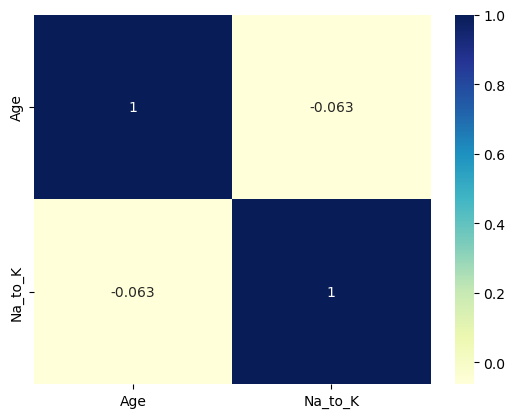

In [19]:
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

### 6.Feature Engineering

In [20]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,stratify = cv)

In [21]:
numerical_data=x_train.select_dtypes(include=["int64","float64"])
nominal_data=x_train.select_dtypes(include=["object"])
ordinal_data = x_train.select_dtypes(include = ["category"])

In [22]:
numerical_data

,Age,Na_to_K
136,55,10.977
188,65,34.997
75,26,20.909
169,20,11.262
25,28,18.809
...,...,...
104,22,28.294
172,39,17.225
159,34,12.923
155,49,10.537


In [23]:
ordinal_data

,BP,Cholesterol
136,HIGH,HIGH
188,HIGH,NORMAL
75,LOW,NORMAL
169,HIGH,HIGH
25,HIGH,NORMAL
...,...,...
104,HIGH,NORMAL
172,NORMAL,NORMAL
159,LOW,NORMAL
155,LOW,HIGH


In [24]:
nominal_data

,Sex
136,F
188,M
75,M
169,F
25,F
...,...
104,M
172,F
159,F
155,M


In [25]:
ordinal_data.columns

Index(['BP', 'Cholesterol'], dtype='object')

In [26]:
nup=Pipeline([('Null_values_imputation_1', SimpleImputer(strategy='mean')),('StandardScalar', StandardScaler()),('Power_Transform',PowerTransformer())])
nom_p = Pipeline([('Null_values_imputation_2', SimpleImputer(strategy='most_frequent')),('OH_Encoding', OneHotEncoder(sparse_output= False,drop= 'first'))])
ordinal_p = Pipeline([('Null_values_imputation_2', SimpleImputer(strategy='most_frequent')),
                         ('Ordinal_Encoding', OrdinalEncoder(categories= [['NORMAL','LOW','HIGH'],['NORMAL','HIGH']]))])

In [27]:
prepro_col_trans = ColumnTransformer(transformers= [('Ordinal_Pre-Processing', ordinal_p, ordinal_data.columns),
                                                    ('Nominal_Pre-Processing', nom_p, nominal_data.columns),
                                                    ('numerical_Pre-Processing', nup, numerical_data.columns)],remainder="passthrough")

In [28]:
finalp = Pipeline([('Pre-Processing',prepro_col_trans)])

In [29]:
finalp

Pipeline(steps=[('Pre-Processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinal_Pre-Processing',
                                                  Pipeline(steps=[('Null_values_imputation_2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal_Encoding',
                                                                   OrdinalEncoder(categories=[['NORMAL',
                                                                                               'LOW',
                                                                                               'HIGH'],
                                                                                              ['NORMAL',
                                                                                               'HIGH']]))]),
                                                  Index(['BP', 'Cholesterol'], dtype='object')),
                                                 ('Nominal_P...
                                                  Pipeline(steps=[('Null_values_imputation_2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OH_Encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex'], dtype='object')),
                                                 ('numerical_Pre-Processing',
                                                  Pipeline(steps=[('Null_values_imputation_1',
                                                                   SimpleImputer()),
                                                                  ('StandardScalar',
                                                                   StandardScaler()),
                                                                  ('Power_Transform',
                                                                   PowerTransformer())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object'))]))])

In [30]:
finalp.fit_transform(x_train)

array([[ 2.        ,  1.        ,  0.        ,  0.61480466, -0.67906384],
       [ 2.        ,  0.        ,  1.        ,  1.19939911,  1.93531903],
       [ 1.        ,  0.        ,  1.        , -1.13651747,  0.91258056],
       [ 2.        ,  1.        ,  0.        , -1.50812665, -0.61202448],
       [ 2.        ,  0.        ,  0.        , -1.01317268,  0.6833748 ],
       [ 2.        ,  1.        ,  1.        ,  1.48924659, -0.95701088],
       [ 1.        ,  0.        ,  0.        ,  1.19939911, -0.07897522],
       [ 2.        ,  1.        ,  0.        ,  0.67360392,  1.31141137],
       [ 2.        ,  1.        ,  1.        , -1.32203934, -1.45233184],
       [ 1.        ,  1.        ,  1.        , -1.38400768, -1.41277856],
       [ 0.        ,  0.        ,  0.        ,  0.26007501, -1.07818152],
       [ 0.        ,  0.        ,  0.        ,  0.73232058,  1.35012685],
       [ 0.        ,  1.        ,  0.        ,  1.43139096, -0.90223811],
       [ 0.        ,  0.        ,  0. 

In [31]:
finalp.get_feature_names_out()

array(['Ordinal_Pre-Processing__BP',
       'Ordinal_Pre-Processing__Cholesterol',
       'Nominal_Pre-Processing__Sex_M', 'numerical_Pre-Processing__Age',
       'numerical_Pre-Processing__Na_to_K'], dtype=object)

In [32]:
x_trainp = finalp.fit_transform(x_train)
x_testp = finalp.transform(x_test)

## 7.Training

In [33]:
from mixed_naive_bayes import MixedNB

In [34]:
mb = MixedNB(categorical_features= [0,1,2])
model = mb.fit(x_trainp, y_train)

## 8. Model Evaluation

#### finding precission score of model

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

confusion_matrix(y_test,model.predict(x_testp))

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [36]:
accuracy_score(y_test,model.predict(x_testp))

1.0

In [37]:
print(classification_report(y_test, model.predict(x_testp)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



It will give the accuracy rate of 99% by using Precision_score

In [38]:
import pickle

In [39]:
pickle.dump(finalp,open(r"C:\Users\Hari D\OneDrive\Documents\visual studio\naive_drug.pkl","wb"))
pickle.dump(model,open(r"C:\Users\Hari D\OneDrive\Documents\visual studio\navie_model_d.pkl","wb"))

In [40]:
fm = pickle.load(open(r"C:\Users\Hari D\OneDrive\Documents\visual studio\naive_drug.pkl","rb"))
model1 = pickle.load(open(r"C:\Users\Hari D\OneDrive\Documents\visual studio\navie_model_d.pkl","rb"))

## 9.Testing

In [41]:
lbe.classes_  

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [42]:
dict = {}
for i in lbe.classes_:                       
  dict[list(lbe.classes_).index(i)] = i
dict

{0: 'DrugY', 1: 'drugA', 2: 'drugB', 3: 'drugC', 4: 'drugX'}

In [43]:
m = pd.DataFrame(list(x_testp)).iloc[[2]]
pred = model.predict(m)   
print(dict[pred[0]])

DrugY


In [44]:
'''import streamlit as s

s.title("Pridict The person which drug is used")
s.title('Durga')

Age = s.number_input(" Age of the person")
Sex = s.radio("Sex",['F','M'])
BP = s.radio("Level of BP",['HIGH','NORMAL','LOW'])
Cholesterol = s.radio("Level of Cholesterol",['HIGH','NORMAL'])
Na_to_K = s.number_input("Na_to_K  of the person")





query1 = finalp.transform(pd.DataFrame([[Age,Sex,BP,Cholesterol,Na_to_K]],
    columns=["Age","Sex","BP","Cholesterol","Na_to_K"]))

pre1 = model.predict(query1)



if s.button("submit"):
    s.write(pre1)'''


'import streamlit as s\n\ns.title("Pridict The person which drug is used")\ns.title(\'Durga\')\n\nAge = s.number_input(" Age of the person")\nSex = s.radio("Sex",[\'F\',\'M\'])\nBP = s.radio("Level of BP",[\'HIGH\',\'NORMAL\',\'LOW\'])\nCholesterol = s.radio("Level of Cholesterol",[\'HIGH\',\'NORMAL\'])\nNa_to_K = s.number_input("Na_to_K  of the person")\n\n\n\n\n\nquery1 = finalp.transform(pd.DataFrame([[Age,Sex,BP,Cholesterol,Na_to_K]],\n    columns=["Age","Sex","BP","Cholesterol","Na_to_K"]))\n\npre1 = model.predict(query1)\n\n\n\nif s.button("submit"):\n    s.write(pre1)'

# or

In [45]:
"""import streamlit as s

s.title("Pridict The person which drug is used")
s.title('Durga')

Age = s.number_input(" Age of the person")
Sex = s.radio("Sex",['F','M'])
BP = s.radio("Level of BP",['HIGH','NORMAL','LOW'])
Cholesterol = s.radio("Level of Cholesterol",['HIGH','NORMAL'])
Na_to_K = s.number_input("Na_to_K  of the person")





query1 = finalp.transform(pd.DataFrame([[Age,Sex,BP,Cholesterol,Na_to_K]],
    columns=["Age","Sex","BP","Cholesterol","Na_to_K"]))

pre1 = model.predict(query1)
if pre1 == 0:
    x = "DrugY"
elif pre1 == 1:
    x="drugA"
elif pre1 == 2:
    x="drugB"
elif  pre1 == 3:
    x="drugC"
else:
    x="DrugX"

if s.button("submit"):
    s.write(x)"""

'import streamlit as s\n\ns.title("Pridict The person which drug is used")\ns.title(\'Durga\')\n\nAge = s.number_input(" Age of the person")\nSex = s.radio("Sex",[\'F\',\'M\'])\nBP = s.radio("Level of BP",[\'HIGH\',\'NORMAL\',\'LOW\'])\nCholesterol = s.radio("Level of Cholesterol",[\'HIGH\',\'NORMAL\'])\nNa_to_K = s.number_input("Na_to_K  of the person")\n\n\n\n\n\nquery1 = finalp.transform(pd.DataFrame([[Age,Sex,BP,Cholesterol,Na_to_K]],\n    columns=["Age","Sex","BP","Cholesterol","Na_to_K"]))\n\npre1 = model.predict(query1)\nif pre1 == 0:\n    x = "DrugY"\nelif pre1 == 1:\n    x="drugA"\nelif pre1 == 2:\n    x="drugB"\nelif  pre1 == 3:\n    x="drugC"\nelse:\n    x="DrugX"\n\nif s.button("submit"):\n    s.write(x)'

In [46]:
df.iloc[2:8,:]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
